![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

In [153]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Session_5_6_EXERCISES_Helper.ipynb
%run Session_5_6_EXERCISES_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

shape of image: (300, 451, 3)
dtype of image: uint8


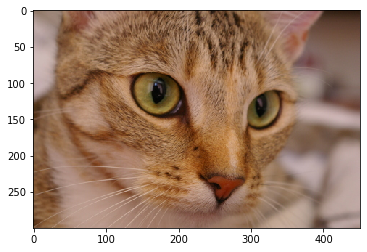

In [72]:
#Load the image 
img = data.chelsea()
plt.imshow(img)
#img_desc = plt.gca()
#plt.set_cmap('gray')

#plt.imshow(img, cmap=plt.cm.gray)
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))
#print(img_desc)
#uint8 --> 0 to 255

<p align="left" style="font-size:16px"><b> Crop the image </b></p>

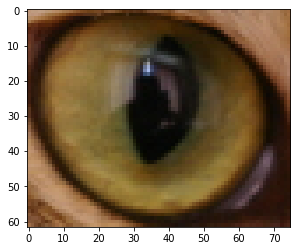

In [73]:
#image[y1:y2, x1:x2]
left_eye = img[85:147,135:210]

#plt.figure(figsize=(6, 6))
plt.imshow(left_eye)

plt.show()

<p align="left" style="font-size:16px"><b> Smoothen the image with a kernel filter. </b></p>

In [74]:
#type(left_eye)
print(left_eye.ndim)
x = left_eye[0:1]
y = left_eye[1:2]
z = left_eye[2:3]
print(x.size)
print(y.size)
print(z.size)

3
225
225
225


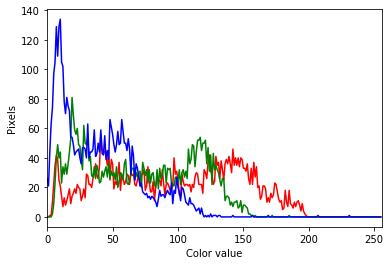

In [75]:
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html
# Make the plot
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        left_eye[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

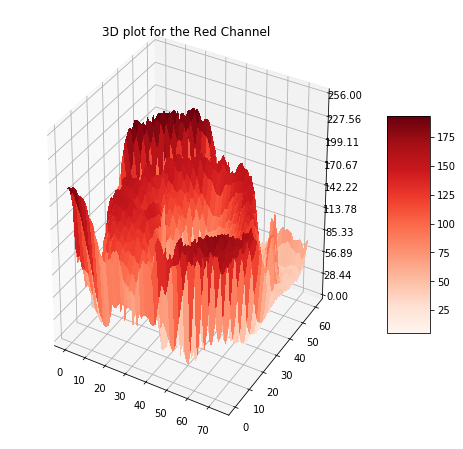

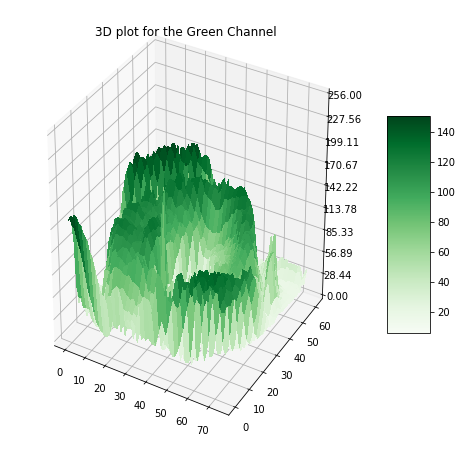

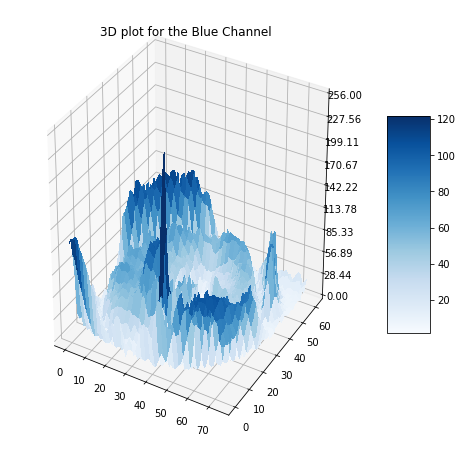

In [104]:
Y = np.arange(left_eye.shape[0])
X = np.arange(left_eye.shape[1])
Z1 = left_eye[...,0]
Z2 = left_eye[...,1]
Z3 = left_eye[...,2]
X, Y = np.meshgrid(X, Y)
plot_3d(X, Y, Z1, cmap='Reds', title='3D plot for the Red Channel')
plot_3d(X, Y, Z2, cmap='Greens', title='3D plot for the Green Channel')
plot_3d(X, Y, Z3, cmap='Blues', title='3D plot for the Blue Channel')

#print("########")
#print(left_eye.shape)
#print(left_eye)
#print("########")
#print(Y.shape)
#print(Y)
#print("########")
#print(X.shape)
#print(X)
#print("########")
#print(Z1.shape)
#print(Z1)
#print("########")
#print(Z2.shape)
#print(Z2)
#print("########")
#print(Z3.shape)
#print(Z3)


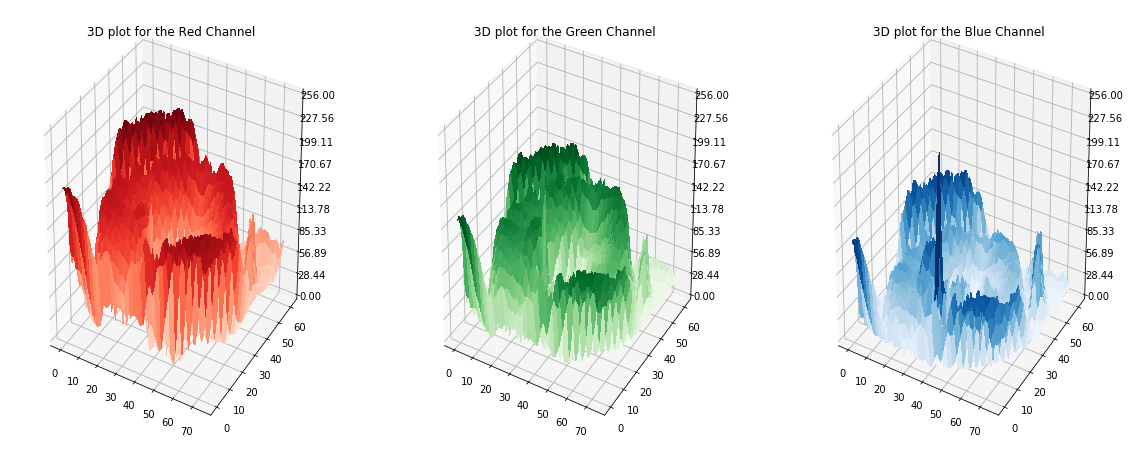

In [154]:
Y = np.arange(left_eye.shape[0])
X = np.arange(left_eye.shape[1])
Z1 = left_eye[...,0]
Z2 = left_eye[...,1]
Z3 = left_eye[...,2]
X, Y = np.meshgrid(X, Y)

plot_3d_rgb_3axes(X, Y, Z1, Z2, Z3, title1='3D plot for the Red Channel', title2='3D plot for the Green Channel', title3='3D plot for the Blue Channel', cmap1='Reds', cmap2='Greens', cmap3='Blues')
#plot_3d_rgb_3axes(X, Y, Z1, Z2, Z3, title='3D plot for the Red Channel', cmap='Reds')

In [77]:
#ax = plt.axes(projection='3d')
#Z = fig(X, Y)
#ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5);

shape of image: (533, 800)
dtype of image: uint8


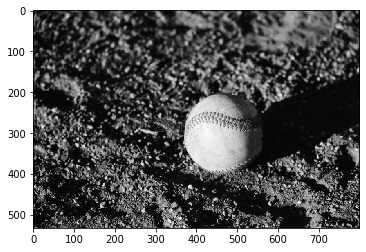

In [78]:
img = imageio.imread('https://thumbs.dreamstime.com/b/baseball-dirt-field-closeup-ball-black-white-174070636.jpg')
#image = camera()
#plt.imshow(image, cmap=plt.cm.gray)
plt.imshow(img, cmap=plt.cm.gray)
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms